In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics


from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut,train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# !pip install xgboost
#from xgboost import XGBRegressor,XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection



In [2]:
df = pd.read_csv('clubmahindra.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df.head(20)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,0765983758d8aee2785a7e2887adeacb67021cb95ada1b...,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,3d1539e56495b699180a3e85a61ca3d03ce48887380e9a...,8,C,8.0,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23-01-2015,11-04-2015,16-04-2015,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,2.0,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28-01-2015,01-02-2015,05-02-2015,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,10.0,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02-05-2015,11-06-2015,16-06-2015,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,26.0,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02-09-2015,14-12-2015,19-12-2015,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,26.0,7.059346
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0...,01-12-2015,12-01-2016,13-01-2016,1,1,2,0,47,1,1,4,2,2.0,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,23.0,8.167707
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0...,20-01-2016,20-01-2016,21-01-2016,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,32.0,6.449838
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e4...,22-08-2016,20-10-2016,25-10-2016,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,23.0,7.046172
8,3706793a0263706fe541b6e7f3b681be363f0b7e2bdc63...,10-09-2016,18-09-2016,24-09-2016,1,1,2,0,45,2,4,3,6,4.0,7.0,10,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,1.0,5.394203
9,1f797a715ff7788cc8162fb033ee0eca345a2209b27593...,03-08-2016,21-11-2016,24-11-2016,1,1,2,0,45,1,5,4,4,3.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,10.0,6.561412


###### label Encoding resort_id

In [5]:
le = LabelEncoder()

In [6]:
df['resort_id'] = le.fit_transform(df['resort_id'])

In [7]:
df.cluster_code = df['cluster_code'].replace({'8':'G'})

In [8]:
df.tail(20)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
341404,a8f1e2dd64f67d8d3693c84b6755c25f12949f0ad72f63...,20-02-2019,25-02-2019,27-02-2019,2,2,2,0,46,1,1,3,2,4.0,2.0,6,2,F,1,2c4f4c865c8034d60e8ef6994aea01c1a2ef0f24031ca5...,F,A,5,8.162431
341405,cbf9269795f85e971371a7559e95fbfd8f5a433802cbde...,20-02-2019,21-02-2019,23-02-2019,3,3,2,0,47,3,3,4,2,4.0,12.0,5,2,B,1,6251a420bc049eba19b9276efc68fe182a5f970980d1b0...,F,A,14,4.564609
341406,1f32a1afc5e525ab97a1d1258c252bb530c2fd81fc3b7a...,20-02-2019,27-02-2019,02-03-2019,3,4,2,0,45,1,5,4,3,4.0,27.0,1,2,F,1,7ce3a862bd328fb305af9ca4d389b8d27f6841f2280d06...,E,A,24,5.795287
341407,ef2d1a22ad60000d268f4f9c89d38154eb7bc7c6adfc99...,25-02-2019,26-02-2019,27-02-2019,1,4,2,0,45,1,1,4,1,4.0,27.0,1,2,F,1,7ce3a862bd328fb305af9ca4d389b8d27f6841f2280d06...,E,A,13,6.892235
341408,3c5310654fc0f82d2b87c73319fa6ad5590079601b16a0...,20-02-2019,21-02-2019,23-02-2019,3,4,3,0,47,3,3,2,3,4.0,8.0,3,2,B,1,06b8962c121f6e64c9afe246b53bf1fbef6a3094782ac8...,A,A,29,6.930148
341409,1832e6c93d56e01d3d99f6a5ce6b8df10ea0399234d1d4...,22-01-2019,23-02-2019,25-02-2019,2,4,3,0,45,1,1,3,2,4.0,10.0,1,3,C,1,3f5a248bad9c895fe4f7cfd6467da9893b21c394b0cabd...,E,A,13,7.617366
341410,e123fe0eb328948d66e7f1b3d3e349f6128fb8430eb5ee...,21-02-2019,27-02-2019,28-02-2019,3,3,3,0,45,1,5,3,1,4.0,32.0,1,3,A,1,d58ad861777ee36270a0d55d1b91e11870a2dfc7c380ed...,E,A,16,8.431742
341411,e6f9805764fabca42ebcefe5c02ea22a5ea2db862326a5...,31-01-2019,21-02-2019,23-02-2019,2,3,4,0,4752,2,2,4,4,3.0,5.0,2,2,F,1,99c977a0626fabdb6a2b07239d7e2a18fa167dd7362b96...,D,A,19,8.346030
341412,03f85654e0cfb99628dc61fb1e6b71c988ba8b56346630...,21-02-2019,23-02-2019,26-02-2019,3,4,3,0,47,2,4,3,3,3.0,4.0,13,2,D,1,1f73e0bd066a2ccbcd414f8556123da1e42845fea093d8...,B,A,17,8.005093
341413,f9bba8bb3d5abc37f8af6be4ab9312947a8275d9e37074...,21-02-2019,24-02-2019,26-02-2019,2,3,2,0,45,1,1,2,2,4.0,10.0,6,2,B,2,33d4e7a9f393ea2f5a25d7cf9dbf9912206c5550a763bb...,F,A,22,8.491895


In [9]:
df.shape

(341424, 24)

In [10]:
df.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

#### removing three id's here ie ; reservation_id,resort_id,persontravellingid

In [11]:
df = df.drop(columns = ['reservation_id','memberid'],axis=1)

In [12]:
df.shape

(341424, 22)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 22 columns):
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  336660 non-null float64
state_code_resort                     3414

In [14]:
df.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428
1,23-01-2015,11-04-2015,16-04-2015,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,F,A,1,6.662563
2,28-01-2015,01-02-2015,05-02-2015,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602
3,02-05-2015,11-06-2015,16-06-2015,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,D,A,25,5.344943
4,02-09-2015,14-12-2015,19-12-2015,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346


In [15]:
df.channel_code.value_counts()

1    161225
3    128042
2     52157
Name: channel_code, dtype: int64

In [16]:
df.main_product_code.value_counts()

2    177615
3     86247
1     57822
4     18619
7      1121
Name: main_product_code, dtype: int64

In [17]:
df.numberofadults.value_counts()

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64

In [18]:
df.numberofadults.value_counts()

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64

In [19]:
df.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [20]:
df[df['season_holidayed_code'].isnull()]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
296,01-02-2016,18-05-2016,22-05-2016,1,1,2,2,45,1,1,2,4,NaN,15.0,6,4,C,1,F,A,5,8.197141
1081,01-02-2016,22-05-2016,25-05-2016,1,1,4,0,45,1,1,2,3,NaN,8.0,6,2,G,1,F,B,5,7.221797
21702,08-05-2016,17-05-2016,21-05-2016,1,1,3,1,45,1,1,2,4,NaN,2.0,6,4,E,1,F,A,5,6.627826
25387,03-05-2016,21-05-2016,26-05-2016,3,3,3,0,45,1,1,3,5,NaN,10.0,6,3,D,1,F,A,5,8.128805
26818,03-05-2016,23-05-2016,25-05-2016,3,3,2,0,45,1,1,3,3,NaN,1.0,6,5,H,1,F,A,5,7.731696
28869,30-04-2016,22-05-2016,26-05-2016,1,1,2,1,45,1,1,2,4,NaN,2.0,6,3,E,1,F,A,5,7.271815
33967,21-03-2016,21-05-2016,24-05-2016,1,1,3,0,45,1,1,3,10,NaN,15.0,6,3,C,1,F,A,5,7.390566
35670,10-05-2016,23-05-2016,26-05-2016,1,1,9,0,45,1,1,3,9,NaN,8.0,6,3,F,1,F,A,5,9.647242
45498,21-04-2016,23-05-2016,27-05-2016,3,2,5,0,45,1,1,3,8,NaN,8.0,6,3,I,1,F,A,5,8.902034
45499,21-04-2016,23-05-2016,27-05-2016,3,2,5,0,45,1,1,3,8,NaN,8.0,6,3,I,1,F,A,5,7.001216


In [21]:
nan1 = df[(df['persontravellingid']== 45) & (df['resort_region_code']==1) & (df['resort_type_code']==1)]

In [22]:
nan1

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
14,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,45,1,1,2,1,3.0,8.0,6,4,H,1,F,C,5,9.932153
15,05-04-2018,08-03-2012,11-03-2012,3,1,2,0,45,1,1,2,1,3.0,8.0,6,3,H,1,F,C,5,3.218876
28,22-02-2016,27-03-2016,29-03-2016,1,2,4,3,45,1,1,2,4,2.0,2.0,6,4,D,1,F,A,5,9.278027
33,31-03-2018,13-04-2018,15-04-2018,3,2,3,0,45,1,1,3,2,2.0,5.0,1,4,D,2,E,C,4,8.342892
34,31-03-2018,12-03-2012,18-03-2012,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,D,2,E,C,4,7.029715
47,27-09-2016,20-10-2016,23-10-2016,3,1,4,0,45,1,1,3,6,3.0,2.0,6,2,F,1,F,B,5,6.412803
64,30-05-2016,15-09-2016,18-09-2016,3,2,2,0,45,1,1,3,3,4.0,6.0,1,2,I,1,E,A,13,6.824540
65,30-05-2016,18-09-2016,20-09-2016,3,2,2,0,45,1,1,3,2,4.0,6.0,1,2,I,1,E,A,23,7.100794
81,05-04-2018,23-03-2012,26-03-2012,1,3,4,0,45,1,1,3,4,2.0,2.0,1,3,E,1,E,C,13,7.229536
93,17-04-2017,06-05-2017,09-05-2017,2,2,8,0,45,1,1,2,9,2.0,7.0,6,5,D,2,F,A,22,7.363085


In [23]:
nan1['season_holidayed_code'].mode()

0    3.0
dtype: float64

In [24]:
df['season_holidayed_code'] = df['season_holidayed_code'].replace()

In [25]:
df.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [26]:
df.dropna(inplace = True)

In [27]:
df.isnull().sum()

booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
dtype: int64

#### Checking for zero person in the observation

In [28]:
df['total_person'] = df['numberofadults']  + df['numberofchildren']

In [29]:
df.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person
0,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428,2
1,23-01-2015,11-04-2015,16-04-2015,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,F,A,1,6.662563,2
2,28-01-2015,01-02-2015,05-02-2015,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,2
3,02-05-2015,11-06-2015,16-06-2015,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,D,A,25,5.344943,4
4,02-09-2015,14-12-2015,19-12-2015,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,2


In [30]:
df[df['total_person']==0]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person
5352,16-04-2018,29-04-2018,01-05-2018,1,4,0,0,45,2,1,4,2,3.0,7.0,9,3,B,2,B,A,11,7.634888,0
12566,20-02-2017,07-04-2017,10-04-2017,1,2,0,0,45,1,2,3,3,2.0,2.0,11,3,D,1,F,A,27,6.926593,0
36366,14-04-2017,02-05-2017,05-05-2017,1,3,0,0,45,1,5,4,3,2.0,1.0,1,4,H,1,E,A,24,7.306455,0
68167,09-11-2016,10-11-2016,12-11-2016,1,2,0,0,45,3,3,3,2,3.0,7.0,3,4,D,1,A,B,29,9.177836,0
78769,11-12-2017,30-03-2018,01-04-2018,1,2,0,0,45,1,1,3,2,3.0,2.0,6,4,C,2,F,A,22,8.770126,0
99340,06-05-2018,29-05-2018,30-05-2018,1,1,0,0,45,1,5,3,3,1.0,8.0,1,3,D,1,E,A,24,9.258593,0
155198,05-12-2017,25-03-2018,27-03-2018,1,2,0,0,45,1,1,3,3,3.0,7.0,1,4,D,1,E,A,13,8.052255,0
161369,01-08-2018,10-11-2018,12-11-2018,1,1,0,0,45,1,1,2,2,2.0,8.0,6,6,C,2,F,A,22,8.099849,0
168590,19-09-2017,26-10-2017,29-10-2017,1,2,0,0,46,1,1,3,6,2.0,8.0,6,3,E,1,F,B,5,7.691100,0
190716,03-09-2017,06-12-2017,08-12-2017,1,2,0,0,45,1,1,4,3,4.0,8.0,6,4,C,1,F,A,22,5.683784,0


In [31]:
df[df['total_person']==0].shape

(23, 23)

In [32]:
df[df['total_person']< 0].shape

(0, 23)

there are 23 observations with no person travelling but still booking is there

now we will drop these observation

#### checking for negative roomnights

In [33]:
df[df['roomnights']<0]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person
36008,30-12-2014,22-03-2015,29-03-2015,1,2,4,3,45,1,1,2,-45,3.0,8.0,6,4,D,1,F,A,22,7.779262,7


#### data difference between booking data and checkin date

In [34]:
df['checkin_date'] = df['checkin_date'].astype('datetime64[ns]')

In [35]:
df['booking_date'] = df['booking_date'].astype('datetime64[ns]')

In [36]:
df['checkout_date'] = df['checkout_date'].astype('datetime64[ns]')

#### making new columns to confirm date deformities

In [37]:
df['book_checkout_diff']  = df['checkout_date']  - df['booking_date']

In [38]:
df['chickin_checkout_diff']  =df['checkout_date'] -  df['checkin_date']  

In [39]:
df['book_checkin_diff']  = df['checkin_date']  - df['booking_date']

#### now will check date deformities

In [40]:
df[df['book_checkin_diff']< '0 days'].shape

(73756, 26)

In [41]:
df['book_checkin_diff'].nunique()

791

In [42]:
df[df['chickin_checkout_diff']<'0 days'].shape

(45514, 26)

In [43]:
df['chickin_checkout_diff'].nunique()

201

In [44]:
df[df['book_checkout_diff']<'0 days'].shape

(75835, 26)

In [45]:
df['book_checkout_diff'].nunique()

791

altogehter we can remove 195105 just on date deformities

In [46]:
73756+45514+75835

195105

In [47]:
df.shape

(336660, 26)

In [48]:
(45574/336660)*100

13.537099744549398

In [49]:
336660-195105

141555

In [50]:
df[(df['book_checkin_diff']< '0 days') & (df['chickin_checkout_diff']<'0 days') & (df['book_checkout_diff']<'0 days') ]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person,book_checkout_diff,chickin_checkout_diff,book_checkin_diff
10,2017-03-02,2017-02-28,2017-01-03,2,1,2,0,46,2,0,4,3,2.0,7.0,9,2,F,1,B,A,21,6.820005,2,-58 days,-56 days,-2 days
34,2018-03-31,2012-12-03,2012-03-18,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,D,2,E,C,4,7.029715,3,-2204 days,-260 days,-1944 days
76,2018-10-07,2018-07-31,2018-04-08,1,2,4,0,47,1,1,4,8,4.0,3.0,1,2,G,1,E,A,13,8.413259,4,-182 days,-114 days,-68 days
381,2016-12-10,2016-10-30,2016-03-11,3,1,3,0,46,2,1,3,4,1.0,7.0,7,3,G,1,C,A,26,8.724222,3,-274 days,-233 days,-41 days
474,2015-12-03,2015-03-29,2015-01-04,3,2,2,0,45,1,1,3,3,3.0,1.0,1,4,D,1,E,A,13,7.459761,2,-333 days,-84 days,-249 days
490,2016-11-04,2016-07-31,2016-04-08,1,1,2,0,45,2,2,2,4,4.0,8.0,2,2,E,1,D,C,25,7.608324,2,-210 days,-114 days,-96 days
901,2015-12-03,2015-03-29,2015-01-04,3,2,3,0,4752,2,1,1,3,2.0,8.0,7,5,D,2,C,A,26,6.436433,3,-333 days,-84 days,-249 days
926,2016-11-06,2016-06-29,2016-01-07,1,2,10,0,45,1,5,3,8,3.0,2.0,1,2,E,1,E,A,16,9.380013,10,-304 days,-174 days,-130 days
1066,2017-12-04,2017-06-30,2017-03-07,1,2,2,1,45,3,3,3,4,2.0,6.0,5,3,B,1,F,A,14,7.212872,3,-272 days,-115 days,-157 days
1165,2017-11-02,2017-05-31,2017-04-06,1,2,3,1,45,1,1,4,8,2.0,13.0,4,2,D,1,F,A,28,7.733476,4,-210 days,-55 days,-155 days


### relationship between 'book_checkout_diff', 'chickin_checkout_diff','book_checkin_diff' and terger variabel one by one

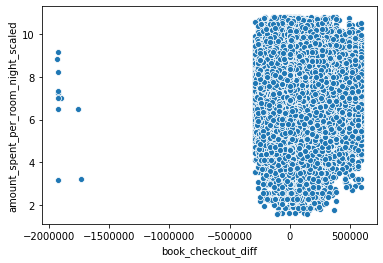

In [51]:
sns.scatterplot(x=(df['book_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

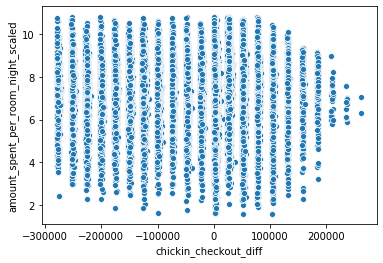

In [52]:
sns.scatterplot(x=(df['chickin_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

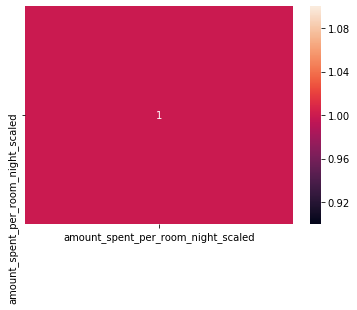

In [53]:
sns.heatmap(df[['book_checkout_diff','amount_spent_per_room_night_scaled']].corr(),annot=True)
plt.show()

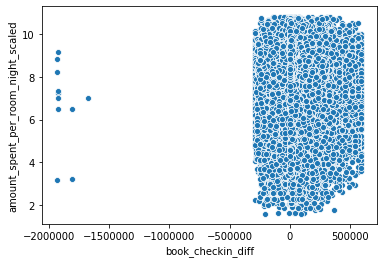

In [54]:
sns.scatterplot(x=(df['book_checkin_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

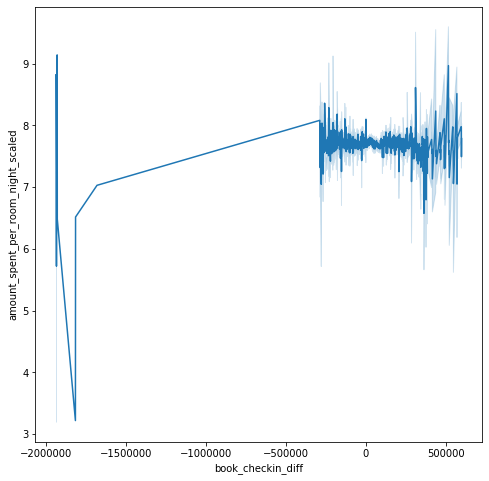

In [55]:
plt.subplots(figsize=(8,8))
sns.lineplot(x=(df['book_checkin_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

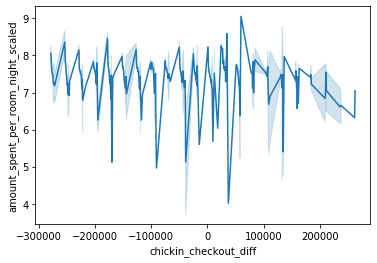

In [56]:
sns.lineplot(x=(df['chickin_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

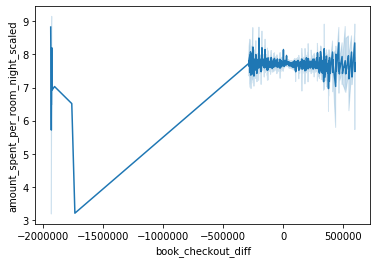

In [57]:
sns.lineplot(x=(df['book_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'])
plt.show()

### creating new column people deifference

In [58]:
df['crowd_difference'] = df['total_person'] - df['total_pax']

In [59]:
df.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person,book_checkout_diff,chickin_checkout_diff,book_checkin_diff,crowd_difference
0,2018-05-04,2018-05-04,2018-06-04,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428,2,31 days,31 days,0 days,-1
1,2015-01-23,2015-11-04,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,F,A,1,6.662563,2,83 days,-202 days,285 days,0
2,2015-01-28,2015-01-02,2015-05-02,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,2,94 days,120 days,-26 days,0
3,2015-02-05,2015-11-06,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,D,A,25,5.344943,4,131 days,-143 days,274 days,2
4,2015-02-09,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,2,313 days,5 days,308 days,0


In [60]:
df[df['crowd_difference']<0].shape

(86947, 27)

### now we will drop 'booking_date',-ve value 'roomnights',negative value 'chickin_checkout_diff','book_checkout_diff','book_checkin_diff' and  	'total_person' with 0 value

In [61]:
df.drop(columns=['booking_date','book_checkout_diff','book_checkin_diff'],axis=1,inplace=True)

In [62]:
##df.sample(frac  = 1/6,replace=False,random_state=0 )

###### now will remove -ve value 'roomnights'

In [63]:
df = df[~(df['roomnights'] <0)]# using inverse ~ of the condition

In [64]:
df[df['roomnights']<0]

,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,total_person,chickin_checkout_diff,crowd_difference


######  now will remove 'crowd_difference' with 0 value

In [65]:
df = df[df['total_person']!=0]

###### now will remove negative value 'chickin_checkout_diff'

In [66]:
df = df[~(df['chickin_checkout_diff'] < '0')]

###### now will remove 'crowd_difference' and '	total_person' columns

In [67]:
df = df.drop(['crowd_difference','total_person'],axis=1)

In [68]:
df.shape

(291126, 22)

In [69]:
# df.to_csv('submission.csv',index=False)

## cheking normality of our target variable

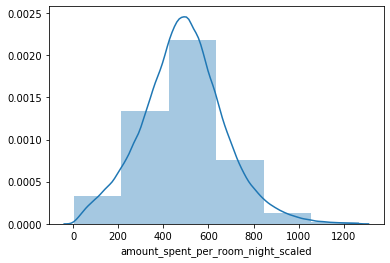

In [70]:
sns.distplot(df['amount_spent_per_room_night_scaled']**3,bins=6)
plt.show()

In [71]:
from scipy import stats
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**3))

(4149.7487047329705, 0.0)


In [72]:
from scipy import stats
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**2))

(7241.3738637055085, 0.0)


In [73]:
from scipy import stats
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']))

(79923.74363133585, 0.0)


In [74]:
from scipy import stats
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**4))

(33436.60516217072, 0.0)


from the above observations we can see that targer variable with power 3 is giving best result though it is not normal but better than others
4149.7487047329705 > 5.99 therefore it is not perfectaly normal

In [75]:
df['amount_spent_per_room_night_scaled'].nunique()

239519

#### now we will check normality of residual using jarque bera test using OLS (as number of observation is > 2000) 

In [76]:
df.drop(['chickin_checkout_diff','checkin_date', 'checkout_date'],axis=1,inplace = True)

In [77]:
y = df['amount_spent_per_room_night_scaled']
x = df.drop('amount_spent_per_room_night_scaled',axis=1)

In [78]:
df.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [79]:
x = pd.get_dummies(data=x,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code'])

In [80]:
x.head()

,resort_id,channel_code_1,channel_code_2,channel_code_3,main_product_code_1,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_1,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_0,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_45,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_1,resort_region_code_2,resort_region_code_3,resort_type_code_0,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_1,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_0,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_1.0,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_1.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_1,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_0,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_8,member_age_buckets_A,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_1,booking_type_code_2,cluster_code_A,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,cluster_code_G,reservationstatusid_code_A,reservationstatusid_code_B,reservationstatusid_code_C
0,7,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0

In [81]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [82]:
X_constant = sm.add_constant(x)

In [83]:
lin_reg = sm.OLS(y,X_constant).fit()

In [84]:
import scipy.stats 

In [85]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.112
Model:                                            OLS   Adj. R-squared:                  0.111
Method:                                 Least Squares   F-statistic:                     202.9
Date:                                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                                        17:25:31   Log-Likelihood:            -4.2170e+05
No. Observations:                              291126   AIC:                         8.438e+05
Df Residuals:                                  290945   BIC:                         8.457e+05
Df Model:                                         180                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1716      0.045     47.826      0.000       2.083       2.261
resort_id                     -0.0083      0.000    -27.663      0.000      -0.009      -0.008
channel_code_1                 0.6228      0.015     40.483      0.000       0.593       0.653
channel_code_2                 0.8025      0.016     51.446      0.000       0.772       0.833
channel_code_3                 0.7463      0.015     48.390      0.000       0.716       0.777
main_product_code_1            0.6107      0.012     50.296      0.000       0.587       0.635
main_product_code_2            0.4999      0.012     42.887      0.000       0.477       0.523
main_product_code_3            0.3892      0.012     32.900      0.000       0.366       0.412
main_product_code_4            0.2599      0.013     19.566      0.000       0.234       0.286
main_product_code_7            0.4120      0.028     14.513      0.000       0.356       0.468
numberofadults_1              -0.4451      0.053     -8.378      0.000      -0.549      -0.341
numberofadults_2              -0.3116      0.043     -7.194      0.000      -0.397      -0.227
numberofadults_3              -0.2143      0.043     -4.943      0.000      -0.299      -0.129
numberofadults_4              -0.0960      0.043     -2.222      0.026      -0.181      -0.011
numberofadults_5               0.0806      0.044      1.818      0.069      -0.006       0.167
numberofadults_6               0.1232      0.044      2.833      0.005       0.038       0.209
numberofadults_7               0.2071      0.048      4.359      0.000       0.114       0.300
numberofadults_8               0.2206      0.045      4.899      0.000       0.132       0.309
numberofadults_9               0.3798      0.051      7.421      0.000       0.279       0.480
numberofadults_10              0.4507      0.052      8.682      0.000       0.349       0.552
numberofadults_11              0.2958      0.072      4.087      0.000       0.154       0.438
numberofadults_12              0.4359      0.054      8.082      0.000       0.330       0.542
numberofadults_13              0.5445      0.111      4.889      0.000       0.326       0.763
numberofadults_14              0.5716      0.084      6.832      0.000       0.408       0.736
numberofadults_15              0.3113      0.089      3.498      0.000       0.137       0.486
numberofadults_16              0.4107      0.075      5.463      0.000       0.263       0.558
numberofadults_17              0.4206      0.241      1.746      0.081      -0.052       0.893
numberofadults_18             -0.4958      0.145     -3.4

In [86]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(136982.55596171148, 0.0)


this is far more than 137764.8946340364 > 5.99 therefore not normal

In [87]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid**1/2))

(136982.55596171148, 0.0)


In [88]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid**1/3))

(136982.5559617113, 0.0)


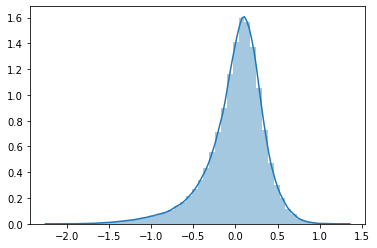

In [89]:
sns.distplot(lin_reg.resid**1/3)
plt.show()

here we can see that by increasing the root value there is no change in normality and by increasing power it is deflecting far from Normality

## Now we will take cube of our target variable and check normality of residual

In [90]:
y_3 = df['amount_spent_per_room_night_scaled']**3

In [91]:
lin_reg_3 = sm.OLS(y_3,X_constant).fit()

In [92]:
lin_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.138
Model:                                            OLS   Adj. R-squared:                  0.137
Method:                                 Least Squares   F-statistic:                     258.8
Date:                                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                                        17:25:53   Log-Likelihood:            -1.9067e+06
No. Observations:                              291126   AIC:                         3.814e+06
Df Residuals:                                  290945   BIC:                         3.816e+06
Df Model:                                         180                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        182.5849      7.454     24.493      0.000     167.974     197.195
resort_id                     -1.3465      0.049    -27.494      0.000      -1.442      -1.250
channel_code_1                40.9199      2.525     16.203      0.000      35.970      45.870
channel_code_2                77.5610      2.561     30.285      0.000      72.541      82.581
channel_code_3                64.1040      2.532     25.318      0.000      59.141      69.067
main_product_code_1           68.4465      1.994     34.335      0.000      64.539      72.354
main_product_code_2           48.7528      1.914     25.478      0.000      45.002      52.503
main_product_code_3           29.0430      1.942     14.956      0.000      25.237      32.849
main_product_code_4            7.7084      2.181      3.535      0.000       3.434      11.982
main_product_code_7           28.6341      4.660      6.144      0.000      19.500      37.768
numberofadults_1            -123.4992      8.722    -14.160      0.000    -140.593    -106.405
numberofadults_2            -100.9937      7.112    -14.200      0.000    -114.934     -87.054
numberofadults_3             -82.6932      7.118    -11.618      0.000     -96.644     -68.742
numberofadults_4             -58.6934      7.093     -8.274      0.000     -72.596     -44.791
numberofadults_5             -22.4807      7.275     -3.090      0.002     -36.740      -8.221
numberofadults_6              -9.8716      7.143     -1.382      0.167     -23.871       4.128
numberofadults_7               9.6361      7.800      1.235      0.217      -5.651      24.923
numberofadults_8              14.3272      7.392      1.938      0.053      -0.161      28.816
numberofadults_9              46.9051      8.401      5.584      0.000      30.440      63.370
numberofadults_10             64.7545      8.521      7.599      0.000      48.053      81.456
numberofadults_11             48.1677     11.883      4.054      0.000      24.878      71.457
numberofadults_12             70.1991      8.856      7.927      0.000      52.842      87.556
numberofadults_13            103.4451     18.284      5.658      0.000      67.610     139.280
numberofadults_14            102.6717     13.737      7.474      0.000      75.748     129.596
numberofadults_15             46.0250     14.608      3.151      0.002      17.395      74.655
numberofadults_16             84.1404     12.342      6.818      0.000      59.951     108.330
numberofadults_17             88.1883     39.543      2.230      0.026      10.684     165.692
numberofadults_18            -81.9434     23.865     -3.4

here we can see that  Jarque-Bera (JB):	6433.790 > 5.99 therefore it is still not normal but the best possible near to normal 

### now we will replace our target variable with cube of it becauuse it is better than actual targer variable on the basis of  normality

##### binning the targer variable

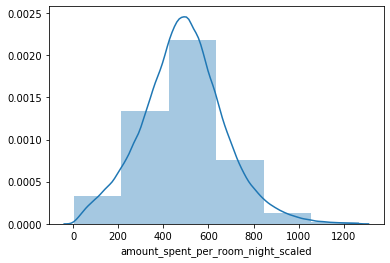

In [93]:
sns.distplot(y_3,bins=6)
plt.show()

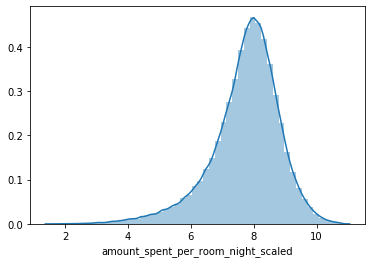

In [94]:
sns.distplot(df['amount_spent_per_room_night_scaled'])
plt.show()

In [95]:
#bins = [0,5,10]
bins = [0,2,4,6,8,10]

In [96]:
#labels = ['0','1']
labels = ['a','b','c','d','e']

In [97]:
## df['cube_amount_spent_per_room_night_scaled'] = df['amount_spent_per_room_night_scaled']**3

In [98]:
df['binned_amount_spent_per_room_night_scaled'] = pd.cut(df['amount_spent_per_room_night_scaled'],bins,labels=labels)


In [99]:
df.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428,d
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,d
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,d
6,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,B,A,31,6.449838,d
7,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,F,A,22,7.046172,d


In [100]:
df.binned_amount_spent_per_room_night_scaled.value_counts()

d    142590
e    126199
c     18345
b      1931
a        24
Name: binned_amount_spent_per_room_night_scaled, dtype: int64

# Sampling and Statistical Analysis

In [101]:
df.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,8,1,G,C,7,7.706428,d
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,d
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,d
6,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,B,A,31,6.449838,d
7,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,F,A,22,7.046172,d


###### for statistical analysis purpose we will convert all are numerical variables into object

In [102]:
df.select_dtypes(['int64','float64']).columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [103]:
df[['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'resort_id']] = df[['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'resort_id']].astype('category')

In [104]:
import statsmodels.api as sm

In [105]:
sample = df.sample(n = 240**2,replace = False,random_state=0 ) 

In [106]:
population = df

In [107]:
import scipy.stats as st

#### Checking statistically if sample is correct representation of population

In [108]:
for i in list(sample.columns) :
    if sample[i].nunique()==population[i].nunique():
            print(i,' \n',st.chi2_contingency(np.array(list(sample[i].value_counts())  + list(population[i].value_counts())).reshape(2,sample[i].nunique())))

channel_code  
 (1.9540874047962353, 0.3764222718226128, 2, array([[ 26842.70401404,  21830.37456341,   8926.92142255],
       [135670.29598596, 110336.62543659,  45119.07857745]]))
main_product_code  
 (1.1436583304315002, 0.8872849022751539, 4, array([[ 29817.46356739,  14617.78014831,   9822.81791435,
          3146.70428933,    195.23408062],
       [150705.53643261,  73882.21985169,  49647.18208565,
         15904.29571067,    986.76591938]]))
persontravellingid  
 (2.6743283016690222, 0.75004192240013, 5, array([[4.50288742e+04, 5.35704479e+03, 5.18361350e+03, 1.80186852e+03,
        2.25460677e+02, 3.13828048e+00],
       [2.27588126e+05, 2.70759552e+04, 2.61993865e+04, 9.10713148e+03,
        1.13953932e+03, 1.58617195e+01]]))
resort_region_code  
 (0.21835884694243654, 0.8965695374472411, 2, array([[ 24162.77765352,  22243.30620602,  11193.91614047],
       [122125.22234648, 112423.69379398,  56577.08385953]]))
resort_type_code  
 (2.482584368557757, 0.8704116378357524, 6, arr

#### here after checking for proportions of  all the categorical columns of sample and populations here we observed that pvalue for all featrues  > 0.05 this means that we fail to reject null hypothesis


#### Conclusion : Proportions of Sample  = Proportions of Populations
#### Therefore Sample is correct representation of population

### Checking if mean of target variable of sample  is  equal to mean of target variable of population 

In [109]:
#3 st.ttest_ind(sample['cube_amount_spent_per_room_night_scaled'],population['cube_amount_spent_per_room_night_scaled'])

##### conclusion : here pvalue(0.27154715673869023)  > alpha(0.05) therefore we failed to reject null hypothesis


### splitting the data in x and y

In [110]:
x = sample.drop(['amount_spent_per_room_night_scaled'
       ,
       'binned_amount_spent_per_room_night_scaled'],axis = 1)

In [111]:
sample['binned_amount_spent_per_room_night_scaled'].isnull().sum()

420

In [112]:
sample['binned_amount_spent_per_room_night_scaled'].value_counts()

d    28400
e    24774
c     3606
b      393
a        7
Name: binned_amount_spent_per_room_night_scaled, dtype: int64

In [113]:
#sample['binned_amount_spent_per_room_night_scaled'].replace({np.nan:'0'},inplace=True)
sample['binned_amount_spent_per_room_night_scaled'].replace({np.nan:'d'},inplace=True)

In [114]:
sample['binned_amount_spent_per_room_night_scaled'].isnull().sum()

0

In [115]:
y = sample['binned_amount_spent_per_room_night_scaled']

###### converting to dummies

In [116]:
x = pd.get_dummies(data=x,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],drop_first=True)

###### adding constant 

In [117]:
import statsmodels.api as sm

In [118]:
x_1 = sm.add_constant(x)

In [119]:
x_1.head()

,const,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_A,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,cluster_code_G,reservationstatusid_code_B,reservationstatusid_code_C,resort_id_1,resort_id_2,resort_id_3,resort_id_4,resort_id_5,resort_id_6,resort_id_7,resort_id_8,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_21,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
166670,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [120]:
x_1.shape

(57600, 219)

In [121]:
219**2

47961

###### splitting the data

In [122]:
57600/3

19200.0

In [123]:
test = df.sample(n = 19200,replace = False,random_state=1 )

In [124]:
x_test = test.drop(['amount_spent_per_room_night_scaled'
       ,
       'binned_amount_spent_per_room_night_scaled'],axis = 1)

In [125]:
#y_test = test['cube_amount_spent_per_room_night_scaled']

In [126]:
x_test = pd.get_dummies(data=x_test,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],drop_first=False)

In [127]:
x_test = sm.add_constant(x_test)

In [128]:
x_test.shape

(19200, 237)

#### checking null values

In [129]:
sample.isnull().sum()

channel_code                                 0
main_product_code                            0
numberofadults                               0
numberofchildren                             0
persontravellingid                           0
resort_region_code                           0
resort_type_code                             0
room_type_booked_code                        0
roomnights                                   0
season_holidayed_code                        0
state_code_residence                         0
state_code_resort                            0
total_pax                                    0
member_age_buckets                           0
booking_type_code                            0
cluster_code                                 0
reservationstatusid_code                     0
resort_id                                    0
amount_spent_per_room_night_scaled           0
binned_amount_spent_per_room_night_scaled    0
dtype: int64

In [130]:
sample['binned_amount_spent_per_room_night_scaled'].value_counts()

d    28820
e    24774
c     3606
b      393
a        7
Name: binned_amount_spent_per_room_night_scaled, dtype: int64

## Classification Model building

In [131]:
x.head()

,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_A,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,cluster_code_G,reservationstatusid_code_B,reservationstatusid_code_C,resort_id_1,resort_id_2,resort_id_3,resort_id_4,resort_id_5,resort_id_6,resort_id_7,resort_id_8,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_21,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
166670,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [132]:
x_1.isnull().sum()[50*4:50*5]

resort_id_13    0
resort_id_14    0
resort_id_15    0
resort_id_16    0
resort_id_17    0
resort_id_18    0
resort_id_19    0
resort_id_20    0
resort_id_21    0
resort_id_22    0
resort_id_23    0
resort_id_24    0
resort_id_25    0
resort_id_26    0
resort_id_27    0
resort_id_28    0
resort_id_29    0
resort_id_30    0
resort_id_31    0
dtype: int64

#### doing backward elimination

In [133]:
x_1.head()

,const,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_A,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,cluster_code_G,reservationstatusid_code_B,reservationstatusid_code_C,resort_id_1,resort_id_2,resort_id_3,resort_id_4,resort_id_5,resort_id_6,resort_id_7,resort_id_8,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_21,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
166670,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [134]:
x_1.shape

(57600, 219)

In [135]:
pd.crosstab(y,x_1.channel_code_2)

channel_code_2,0,1
binned_amount_spent_per_room_night_scaled,,
a,2,5
b,337,56
c,3042,564
d,24822,3998
e,20581,4193


In [136]:
significant = []
for i in list(x_1.columns):
    chi_sq_stat ,p_value,degree_freedom,tabel=st.chi2_contingency(pd.crosstab(y,x_1[i]))
    if p_value < 0.05:
        significant.append(i)
        
print(significant)

['channel_code_2', 'channel_code_3', 'main_product_code_2', 'main_product_code_3', 'main_product_code_4', 'numberofadults_2', 'numberofadults_3', 'numberofadults_4', 'numberofadults_5', 'numberofadults_6', 'numberofadults_7', 'numberofadults_8', 'numberofadults_9', 'numberofadults_10', 'numberofadults_11', 'numberofadults_12', 'numberofadults_13', 'numberofadults_14', 'numberofadults_19', 'numberofadults_20', 'numberofadults_21', 'numberofadults_22', 'numberofchildren_1', 'numberofchildren_2', 'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_5', 'numberofchildren_6', 'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47', 'persontravellingid_4752', 'resort_region_code_2', 'resort_region_code_3', 'resort_type_code_1', 'resort_type_code_2', 'resort_type_code_3', 'resort_type_code_4', 'resort_type_code_5', 'resort_type_code_7', 'room_type_booked_code_2', 'room_type_booked_code_3', 'room_type_booked_code_4', 'roomnights_1', 'roomnights_2', 'roomnights_3', 'room

In [137]:
x_1 = x_1[['const','channel_code_2', 'channel_code_3', 'main_product_code_2', 'main_product_code_3', 'main_product_code_4', 'numberofadults_2', 'numberofadults_3', 'numberofadults_4', 'numberofadults_5', 'numberofadults_6', 'numberofadults_7', 'numberofadults_8', 'numberofadults_9', 'numberofadults_10', 'numberofadults_11', 'numberofadults_12', 'numberofadults_13', 'numberofadults_14', 'numberofadults_15', 'numberofadults_16', 'numberofadults_18', 'numberofadults_19', 'numberofadults_20', 'numberofadults_21', 'numberofadults_22', 'numberofadults_23', 'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2', 'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_5', 'numberofchildren_6', 'numberofchildren_7', 'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47', 'persontravellingid_4752', 'resort_region_code_2', 'resort_region_code_3', 'resort_type_code_1', 'resort_type_code_2', 'resort_type_code_3', 'resort_type_code_4', 'resort_type_code_5', 'resort_type_code_7', 'room_type_booked_code_2', 'room_type_booked_code_3', 'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1', 'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5', 'roomnights_6', 'roomnights_7', 'roomnights_8', 'roomnights_9', 'roomnights_10', 'roomnights_11', 'roomnights_12', 'roomnights_13', 'roomnights_14', 'roomnights_15', 'roomnights_17', 'roomnights_18', 'roomnights_20', 'roomnights_21', 'roomnights_23', 'roomnights_24', 'roomnights_25', 'roomnights_27', 'roomnights_28', 'roomnights_30', 'roomnights_34', 'season_holidayed_code_2.0', 'season_holidayed_code_3.0', 'season_holidayed_code_4.0', 'state_code_residence_2.0', 'state_code_residence_3.0', 'state_code_residence_4.0', 'state_code_residence_6.0', 'state_code_residence_7.0', 'state_code_residence_8.0', 'state_code_residence_10.0', 'state_code_residence_12.0', 'state_code_residence_19.0', 'state_code_resort_2', 'state_code_resort_3', 'state_code_resort_4', 'state_code_resort_5', 'state_code_resort_6', 'state_code_resort_7', 'state_code_resort_9', 'state_code_resort_10', 'state_code_resort_11', 'state_code_resort_13', 'total_pax_1', 'total_pax_2', 'total_pax_4', 'total_pax_5', 'total_pax_6', 'total_pax_7', 'total_pax_8', 'total_pax_9', 'total_pax_12', 'member_age_buckets_A', 'member_age_buckets_B', 'member_age_buckets_D', 'member_age_buckets_E', 'member_age_buckets_G', 'member_age_buckets_H', 'booking_type_code_2', 'cluster_code_B', 'cluster_code_C', 'cluster_code_D', 'cluster_code_E', 'cluster_code_F', 'cluster_code_G', 'resort_id_1', 'resort_id_3', 'resort_id_5', 'resort_id_6', 'resort_id_7', 'resort_id_9', 'resort_id_10', 'resort_id_11', 'resort_id_12', 'resort_id_13', 'resort_id_14', 'resort_id_15', 'resort_id_16', 'resort_id_17', 'resort_id_18', 'resort_id_19', 'resort_id_20', 'resort_id_22', 'resort_id_23', 'resort_id_24', 'resort_id_25', 'resort_id_26', 'resort_id_27', 'resort_id_28', 'resort_id_29', 'resort_id_30', 'resort_id_31']]

In [138]:
x_1.head()

,const,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,persontravellingid_46,persontravellingid_47,persontravellingid_4752,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_17,roomnights_18,roomnights_20,roomnights_21,roomnights_23,roomnights_24,roomnights_25,roomnights_27,roomnights_28,roomnights_30,roomnights_34,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_10.0,state_code_residence_12.0,state_code_residence_19.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_12,member_age_buckets_A,member_age_buckets_B,member_age_buckets_D,member_age_buckets_E,member_age_buckets_G,member_age_buckets_H,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,cluster_code_G,resort_id_1,resort_id_3,resort_id_5,resort_id_6,resort_id_7,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
166670,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
304487,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
255788,1.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23097,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
303583,1.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0

In [139]:
x_1.shape

(57600, 148)

### Model Building

In [140]:
from sklearn.preprocessing import MultiLabelBinarizer

In [141]:
MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [142]:
from sklearn.multiclass import OneVsRestClassifier

In [143]:
LR=OneVsRestClassifier(LogisticRegression())
NB=OneVsRestClassifier(GaussianNB())
KNN=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=9,weights='distance'))
DT=OneVsRestClassifier(DecisionTreeClassifier())
RF=OneVsRestClassifier(RandomForestClassifier(criterion='entropy',n_estimators=10))
# Bagged=BaggingClassifier(n_estimators=50)
# AdaBoost=AdaBoostClassifier(n_estimators=50)
# AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=100)
# GBoost=GradientBoostingClassifier(n_estimators=100)
# stacked = VotingClassifier(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF), ('Bagged', Bagged)])

In [144]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RandomForest',RF))
# models.append(('Bagged',Bagged))
# models.append(('AdaBoost',AdaBoost))
# models.append(('AdaBoostRF',AB_RF))
# models.append(('GradientBoost',GBoost))
# models.append(('VotingClassifier',stacked))

In [145]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_1, y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


Logistic   0.5774010232588797 
NaiveBayes   0.30935027753838396 
KNN   0.5330215272500277 
DT   0.4866026298270259 
RandomForest   0.5413234191452487 


In [146]:
Bagged=OneVsRestClassifier(BaggingClassifier(base_estimator = LogisticRegression(),n_estimators=50))

In [147]:
models = []
models.append(('Bagged',Bagged))

In [148]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_1, y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


Bagged   0.5772644818626227 


In [149]:
AdaBoost=OneVsRestClassifier(AdaBoostClassifier(base_estimator = LogisticRegression(),n_estimators=50))

In [150]:
models = []
models.append(('AdaBoost',AdaBoost))

In [151]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_1, y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


AdaBoost   0.5666312692639133 


In [152]:
Bagged=OneVsRestClassifier(BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=9,weights='distance'),n_estimators=50))

In [153]:
models = []
models.append(('Bagged',Bagged))

In [154]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_1, y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


KeyboardInterrupt: 

In [ ]:
import sklearn

sklearn.metrics.SCORERS.keys()

In [157]:
x_1['binned_amount_spent_per_room_night_scaled'].value_counts()

KeyError: 'binned_amount_spent_per_room_night_scaled'

In [159]:
sample['binned_amount_spent_per_room_night_scaled'].value_counts()

d    28820
e    24774
c     3606
b      393
a        7
Name: binned_amount_spent_per_room_night_scaled, dtype: int64

In [160]:
sample[sample['binned_amount_spent_per_room_night_scaled']=='a']

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
254117,2,3,5,0,4752,1,5,3,6,3.0,2.0,1,3,A,1,E,A,16,1.946862,a
214359,2,3,3,0,45,3,3,2,4,3.0,6.0,3,5,B,1,A,A,29,1.888584,a
11640,2,4,6,0,47,3,4,3,6,4.0,7.0,5,3,B,1,F,A,8,1.897120,a
248521,1,2,3,0,4752,1,2,3,4,3.0,1.0,11,3,F,1,F,A,27,1.609438,a
61659,2,3,3,1,45,3,1,3,6,3.0,8.0,5,2,D,1,F,A,12,1.897120,a
304898,1,2,3,0,45,1,1,3,3,2.0,7.0,6,4,C,2,F,A,5,1.946862,a
138783,2,2,2,2,45,3,3,3,4,1.0,5.0,3,4,E,1,A,A,29,1.945910,a


In [167]:
for i in sample.columns:
    print(sample[sample['binned_amount_spent_per_room_night_scaled']=='a'][i].value_counts())

2    5
1    2
3    0
Name: channel_code, dtype: int64
3    3
2    3
4    1
7    0
1    0
Name: main_product_code, dtype: int64
3     4
2     1
5     1
6     1
32    0
13    0
4     0
7     0
8     0
9     0
10    0
11    0
12    0
14    0
30    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
1     0
Name: numberofadults, dtype: int64
0     5
2     1
1     1
13    0
10    0
8     0
7     0
6     0
5     0
4     0
3     0
Name: numberofchildren, dtype: int64
45      4
4752    2
47      1
4995    0
4753    0
46      0
Name: persontravellingid, dtype: int64
3    4
1    3
2    0
Name: resort_region_code, dtype: int64
3    2
1    2
5    1
4    1
2    1
7    0
0    0
Name: resort_type_code, dtype: int64
3    6
2    1
6    0
5    0
4    0
1    0
Name: room_type_booked_code, dtype: int64
4     3
6     3
3     1
60    0
11    0
18    0
17    0
16    0
15    0
14    0
13    0
12    0
9     0
10    0
20    0
8     0
7     0
5     0
2     0
1     0
19    0


In [161]:
sample[sample['binned_amount_spent_per_room_night_scaled']=='b']

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
155335,1,3,3,2,47,3,3,2,2,3.0,9.0,3,4,F,1,A,A,2,3.433342,b
181108,1,2,16,0,47,1,5,4,24,4.0,8.0,1,2,C,1,E,A,24,3.680007,b
198571,2,3,2,0,47,2,7,4,2,3.0,6.0,9,3,B,1,B,A,31,3.433342,b
79392,1,3,2,0,47,3,3,4,4,4.0,5.0,3,2,I,1,A,A,15,3.465501,b
204189,1,2,4,0,47,2,2,3,8,4.0,2.0,2,2,I,1,D,A,25,3.998476,b
204763,3,3,4,0,45,3,3,2,4,3.0,6.0,5,5,B,2,F,A,14,3.840205,b
311351,3,3,3,0,45,3,3,3,3,3.0,9.0,3,3,C,1,A,A,2,3.566712,b
253746,1,1,4,0,45,2,1,4,8,1.0,8.0,9,2,F,1,B,A,11,3.615502,b
100204,3,1,6,0,45,2,1,4,12,1.0,8.0,7,2,D,1,C,A,18,2.635659,b
67520,1,1,4,0,45,3,3,4,6,2.0,8.0,3,2,E,1,A,A,20,2.554381,b


In [168]:
for i in sample.columns:
    print(sample[sample['binned_amount_spent_per_room_night_scaled']=='b'][i].value_counts())

1    217
3    120
2     56
Name: channel_code, dtype: int64
2    208
3     96
1     54
4     34
7      1
Name: main_product_code, dtype: int64
2     131
4     113
3      62
6      42
5      12
8       9
7       7
9       4
14      2
11      2
10      2
1       2
12      1
16      1
20      1
22      1
24      1
15      0
30      0
13      0
17      0
18      0
19      0
21      0
23      0
25      0
32      0
Name: numberofadults, dtype: int64
0     309
2      39
1      36
4       4
3       3
8       1
6       1
13      0
10      0
7       0
5       0
Name: numberofchildren, dtype: int64
45      252
47       85
46       40
4752     14
4753      2
4995      0
Name: persontravellingid, dtype: int64
1    148
3    140
2    105
Name: resort_region_code, dtype: int64
1    141
3    110
2     75
4     37
5     19
7      9
0      2
Name: resort_type_code, dtype: int64
3    162
2    127
4     99
1      4
5      1
6      0
Name: room_type_booked_code, dtype: int64
3     122
4      80
2      52
6 

In [162]:
sample[sample['binned_amount_spent_per_room_night_scaled']=='c']

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
287512,2,3,5,0,45,2,4,3,2,4.0,7.0,10,2,A,1,B,A,0,5.726196,c
289032,2,3,2,0,45,1,1,3,3,4.0,7.0,1,2,H,1,E,A,13,5.877250,c
282725,3,2,4,0,45,1,1,2,2,3.0,8.0,6,7,C,2,F,A,22,4.752987,c
19179,1,2,8,0,47,2,2,2,8,4.0,12.0,2,4,E,1,D,A,25,5.710272,c
17232,1,2,4,0,45,3,3,2,3,4.0,5.0,5,3,F,1,F,A,14,5.524736,c
136110,3,3,2,0,46,2,2,4,3,4.0,8.0,2,2,H,1,D,A,19,5.884176,c
265331,1,3,4,0,45,1,1,2,2,3.0,7.0,1,6,F,2,E,A,23,5.719147,c
307690,3,3,2,0,45,2,2,4,5,3.0,9.0,2,2,H,1,D,A,25,5.413074,c
199776,1,2,2,0,4752,2,2,2,4,3.0,8.0,2,2,F,1,D,A,10,4.539057,c
236323,3,2,4,0,45,3,4,4,6,1.0,5.0,5,2,E,1,F,A,8,5.013387,c


In [169]:
for i in sample.columns:
    print(sample[sample['binned_amount_spent_per_room_night_scaled']=='c'][i].value_counts())

1    1892
3    1150
2     564
Name: channel_code, dtype: int64
2    1800
3    1032
1     511
4     256
7       7
Name: main_product_code, dtype: int64
2     1693
4      780
3      611
6      220
5       97
8       67
7       36
12      22
1       19
10      18
9       13
14       8
15       5
11       5
16       4
19       2
20       2
17       1
21       1
23       1
24       1
30       0
13       0
18       0
22       0
25       0
32       0
Name: numberofadults, dtype: int64
0     2956
2      316
1      284
4       24
3       17
5        5
6        3
8        1
13       0
10       0
7        0
Name: numberofchildren, dtype: int64
45      2377
47       699
46       331
4752     182
4753      17
4995       0
Name: persontravellingid, dtype: int64
1    1411
2    1364
3     831
Name: resort_region_code, dtype: int64
1    1465
2     881
3     639
4     261
5     168
7     138
0      54
Name: resort_type_code, dtype: int64
3    1548
2     999
4     989
1      55
5      15
6       0
Name: 

In [164]:
sample[sample['binned_amount_spent_per_room_night_scaled']=='d']

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
166670,1,1,2,1,45,1,1,3,4,2.0,8.0,6,3,E,1,F,A,5,6.978149,d
255788,3,4,4,0,45,1,1,2,2,3.0,8.0,1,3,G,1,E,A,4,7.540157,d
23097,3,1,3,0,45,3,1,3,1,2.0,4.0,5,2,E,1,F,C,12,7.294031,d
260331,1,2,2,0,46,2,7,4,3,2.0,8.0,9,3,G,1,B,A,31,7.406774,d
309704,1,1,2,0,45,2,7,4,2,4.0,16.0,9,2,B,1,B,A,31,7.822058,d
65387,1,2,4,0,45,1,1,4,2,4.0,12.0,1,3,C,1,E,A,13,7.962780,d
338816,2,3,2,0,45,3,3,2,3,4.0,5.0,3,4,8,1,G,A,7,6.420766,d
337392,3,2,2,0,45,1,5,3,1,4.0,1.0,1,2,G,2,E,A,24,7.915505,d
185946,3,3,2,0,4752,2,2,2,3,4.0,8.0,2,4,C,1,D,C,10,7.982696,d
179529,1,2,4,0,45,1,1,2,3,1.0,8.0,6,5,F,1,F,A,5,7.921445,d


In [170]:
for i in sample.columns:
    print(sample[sample['binned_amount_spent_per_room_night_scaled']=='d'][i].value_counts())

1    14402
3    10420
2     3998
Name: channel_code, dtype: int64
2    14650
3     7892
1     4365
4     1799
7      114
Name: main_product_code, dtype: int64
2     15058
4      5984
3      5352
6      1077
5       529
8       244
1       171
7       146
9        68
12       49
10       48
16       22
15       19
11       16
14        9
20        6
24        6
30        4
18        4
22        3
13        2
25        2
23        1
17        0
19        0
21        0
32        0
Name: numberofadults, dtype: int64
0     22741
1      3011
2      2888
3        90
4        73
6         7
5         5
8         3
10        1
7         1
13        0
Name: numberofchildren, dtype: int64
45      22063
47       2910
46       2733
4752     1015
4753       98
4995        1
Name: persontravellingid, dtype: int64
1    11450
2    11102
3     6268
Name: resort_region_code, dtype: int64
1    12753
2     6004
3     4705
5     2131
4     1709
7     1123
0      395
Name: resort_type_code, dtype: int64
3   

In [165]:
sample[sample['binned_amount_spent_per_room_night_scaled']=='e']

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled
304487,2,1,2,0,45,2,2,4,4,2.0,8.0,2,5,B,1,D,A,25,8.693532,e
303583,3,3,2,0,45,1,1,3,4,2.0,4.0,6,5,F,1,F,A,5,9.215904,e
194669,2,2,2,2,45,1,1,3,2,1.0,2.0,4,4,E,1,F,A,6,8.063283,e
257374,1,2,4,0,46,3,1,3,2,4.0,9.0,5,3,E,1,F,B,12,9.435365,e
260366,1,2,2,2,45,1,1,2,2,3.0,8.0,1,4,F,1,E,A,13,8.693261,e
83017,1,2,4,0,45,2,7,4,6,2.0,5.0,9,2,G,1,B,A,31,8.124684,e
91036,1,2,3,1,45,1,1,2,4,2.0,2.0,6,4,F,1,F,A,22,8.603440,e
47394,1,2,4,1,45,2,2,1,3,4.0,8.0,2,6,D,1,D,A,25,8.252385,e
133996,1,2,4,0,45,1,5,2,2,3.0,8.0,1,2,F,1,E,A,24,8.492291,e
98735,3,3,5,0,45,2,2,3,8,4.0,3.0,2,2,E,1,D,A,25,8.701744,e


In [171]:
for i in sample.columns:
    print(sample[sample['binned_amount_spent_per_room_night_scaled']=='e'][i].value_counts())

1    10389
3    10192
2     4193
Name: channel_code, dtype: int64
2    13086
3     5635
1     4889
4     1081
7       83
Name: main_product_code, dtype: int64
2     8478
4     7259
3     4676
6     2013
5      968
8      537
7      258
9      170
10     135
12      88
1       60
11      37
14      25
16      19
15      15
13      13
18       8
24       8
20       3
22       3
17       1
30       0
19       0
21       0
23       0
25       0
32       0
Name: numberofadults, dtype: int64
0     18659
1      2925
2      2754
3       206
4       186
6        21
5        20
7         2
8         1
13        0
10        0
Name: numberofchildren, dtype: int64
45      20262
46       2126
47       1650
4752      633
4753      102
4995        1
Name: persontravellingid, dtype: int64
1    11200
2     9648
3     3926
Name: resort_region_code, dtype: int64
1    11921
2     5306
3     2783
5     2191
4     1595
7      675
0      303
Name: resort_type_code, dtype: int64
3    9241
2    9165
4    5801
1

In [166]:
sample[sample['binned_amount_spent_per_room_night_scaled']=='f']

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,binned_amount_spent_per_room_night_scaled


In [4]:
import sklearn

In [5]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])